# How to Solve Numerical Problems in Science with Python Part II

1. Define the problem ***in English*** properly
2. Find a suitable example
    - search it online ***in English*** (www.google.com, www.bing.com, www.baidu.com, https://docs.scipy.org/doc/scipy/reference/tutorial/index.html)
    - seek it in a book (https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html)
    - ask for it from experts
3. Tweak the example for your goals

# 1. Linear Algebra

- scipy.linalg vs numpy.linalg

`scipy.linalg` contains all the functions in `numpy.linalg` plus some other more advanced ones not contained in `numpy.linalg`. Another advantage of using `scipy.linalg` over `numpy.linalg` is that it is always compiled with BLAS/LAPACK support, while for numpy this is optional. Therefore, the scipy version might be faster depending on how numpy was installed. Hence, unless you don’t want to add scipy as a dependency to your numpy program, use `scipy.linalg` instead of `numpy.linalg`.

- Create an array/Matrix using numpy
    - empty, ones, zeros, ones_like, zeros_like, eye, random, idenity, lin\log\geomspace 
- Basic Routines
    - sum, cusum, means, np.median, max, min
    - shape, reshape, ravel, squeeze
    - rot90 (flip, ud, lr)
    - stack (v, h, d), split (v, h, d)
    - roll, rollaxis
- Advanced Routines
    - matrix products (dot, inner, outer)
    - Transpose, Inverse, determinant, trace
    - Rank, Norms, Eigenvalues and eigenvectors
    - Solving alinear system

In [21]:
import numpy as np
import scipy.linalg as spl

# Transpose
a = np.random.randn(4,6)
a.T

# Inverse
b = np.random.randn(6,4)
b_matrix = np.matrix(b)
b_matrix.I

# np.matmul
c = a @ b

# rank of matrix
np.linalg.matrix_rank(a)

# determinant
np.linalg.det(c)

# inner product, outer product, hadamard product of two 1D array
a = np.array([0, 1, 2, 3, 4])
b = np.array([5, 6, 7, 8, 9])
np.inner(a,b)
np.outer(a,b)
a * b

# project a to b
proj_b_a = np.inner(a,b) / np.inner(b,b) * b

# norm of a matrix
np.linalg.norm(c, ord='fro')

# characteristic polynomial
a = np.random.randn(5,5)
np.linalg.det(np.trace(a)*np.identity(5)-a)

# try np.einsum for your purposes
# https://numpy.org/doc/stable/reference/generated/numpy.einsum.html

6.7612986059822555

- Eigenvalues and eigenvectors

In [22]:
import numpy as np

a = np.random.randn(4,4)
w,v = np.linalg.eig(a)

print('E-value:', w)
print('E-vector', v)

E-value: [ 2.2488097 +0.j        0.99271685+0.j       -0.96687213+0.162997j
 -0.96687213-0.162997j]
E-vector [[ 0.44150714+0.j          0.42487542+0.j          0.01843331-0.06085645j
   0.01843331+0.06085645j]
 [-0.81018117+0.j          0.18275807+0.j         -0.58374068-0.01677753j
  -0.58374068+0.01677753j]
 [-0.17120804+0.j          0.70084594+0.j         -0.25613854+0.17488692j
  -0.25613854-0.17488692j]
 [ 0.34549345+0.j         -0.54304266+0.j         -0.7474822 +0.j
  -0.7474822 -0.j        ]]


- Solving linear equation systems

\begin{align}
 4x + 3y + 2z &= 25 \\
-2x + 2y + 3z &= -10 \\
 3x - 5y + 2z &= -4
\end{align}

In [23]:
import numpy as np

A = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
B = np.array([25, -10, -4])
X1 = np.linalg.inv(A).dot(B) # method 1
X2 = np.linalg.solve(A,B) # method 2

print(X1)
print(X2)

[ 5.  3. -2.]
[ 5.  3. -2.]


# 2 Signal Processing

https://docs.scipy.org/doc/scipy/reference/signal.html

## 2.1 Fourier Transform
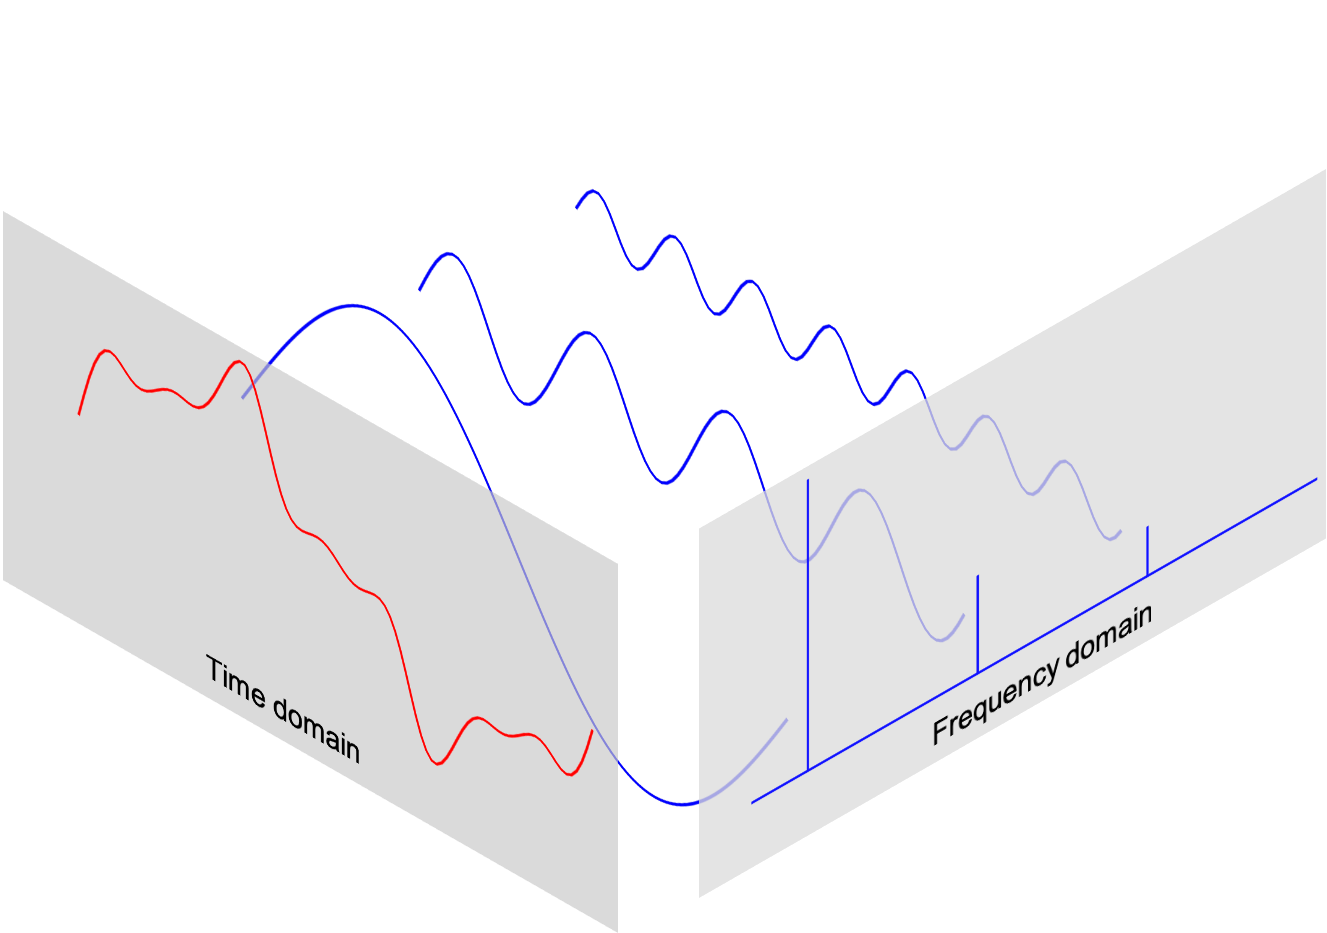



- Fourier Transform
\begin{equation}
{\hat{f}}(\xi )=\int_{-\infty }^{\infty } f(x)  e^{-2\pi ix\xi }\,dx
\end{equation}

- Inverse Fourier Transform
\begin{equation}
 f(x)=\int _{-\infty }^{\infty }{\hat {f}}(\xi )\ e^{2\pi ix\xi }\,d\xi
\end{equation}

- Discrete Fourier transform
\begin{aligned}X_{k}&=\sum _{n=0}^{N-1}x_{n}\cdot e^{-{\frac {i2\pi }{N}}kn}\\&=\sum _{n=0}^{N-1}x_{n}\cdot \left[\cos \left({\frac {2\pi }{N}}kn\right)-i\cdot \sin \left({\frac {2\pi }{N}}kn\right)\right]
\end{aligned}

- Inverse Discrete Fourier transform
\begin{equation}
x_{n}={\frac {1}{N}}\sum _{k=0}^{N-1}X_{k}\cdot e^{i{\frac {2\pi }{N}}kn}
\end{equation}

Text(0, 0.5, 'Amplitude')

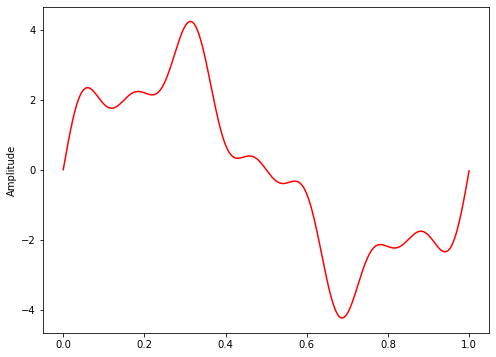

In [24]:
import numpy as np
import pylab as pl
%matplotlib inline

# Mock Data

sr = 2000
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)
freq = 4
x += np.sin(2*np.pi*freq*t)
freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

pl.figure(figsize = (8, 6))
pl.plot(t, x, 'r')
pl.ylabel('Amplitude')

/Users/Uranus/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


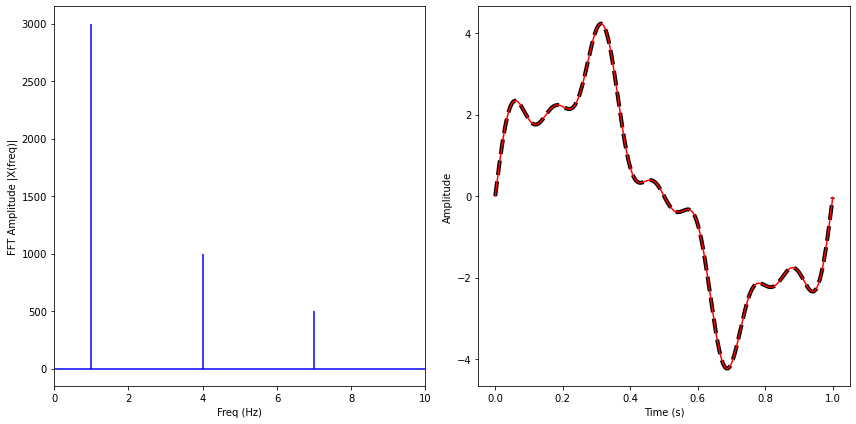

In [25]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

pl.figure(figsize = (12, 6))
pl.subplot(121)
pl.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
pl.xlabel('Freq (Hz)')
pl.ylabel('FFT Amplitude |X(freq)|')
pl.xlim(0, 10)
pl.subplot(122)
pl.plot(t, x, 'k--', lw=4)
pl.plot(t, ifft(X), 'r')
pl.xlabel('Time (s)')
pl.ylabel('Amplitude')
pl.tight_layout()

## 2.2 Convolution


\begin{equation}
(f*g)(t):=\int _{-\infty }^{\infty }f(\tau )g(t-\tau )\,d\tau
\end{equation}

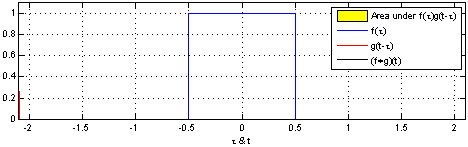
- Convolution theorem
>In mathematics, the convolution theorem states that under suitable conditions the Fourier transform of a convolution of two functions (or signals) is the pointwise product of their Fourier transforms



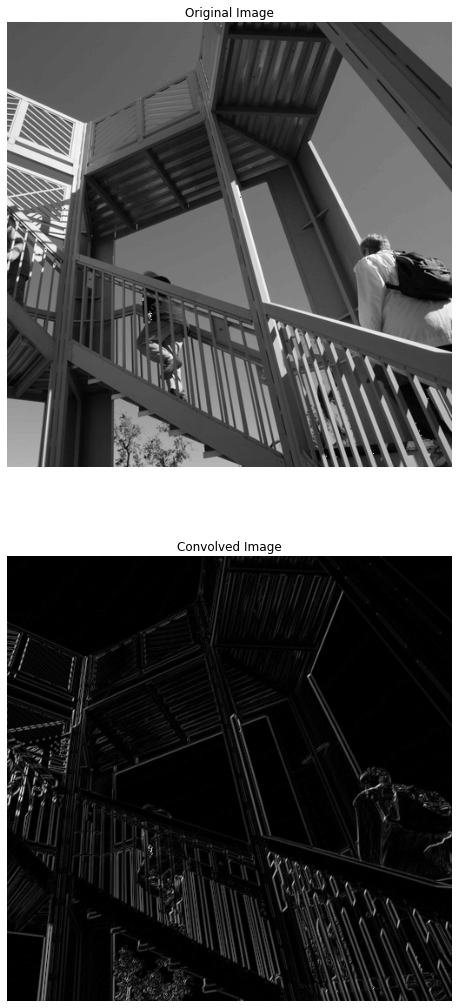

In [6]:
# scipy.signal.convolve2d

import numpy as np
import pylab as pl
from scipy import signal
from scipy import misc

ascent = misc.ascent() # input picture, which is an 2d array.
# replace this with your own picture

scharr = np.array([[ -3, -10,  +3],
                   [-10, 0,   +10],
                   [ -3, 10,  +3]]) # your kernel, which can be a complex number too, Gx + j*Gy.
# and your own kernel

grad = signal.convolve2d(ascent, scharr, boundary='symm', mode='same')

fig, (ax_orig, ax_mag) = pl.subplots(2, 1, figsize=(12, 18))
ax_orig.imshow(ascent, cmap='gray')
ax_orig.set_title('Original Image')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Convolved Image')
ax_mag.set_axis_off()

# 3. Statistics 
- Data Manipulation (pandas.pydata.org)
- Analysis ( numpy and scipy.stats: mean, median, std)
- Visualization (matplotlib and seaborn)

### Correlation functions
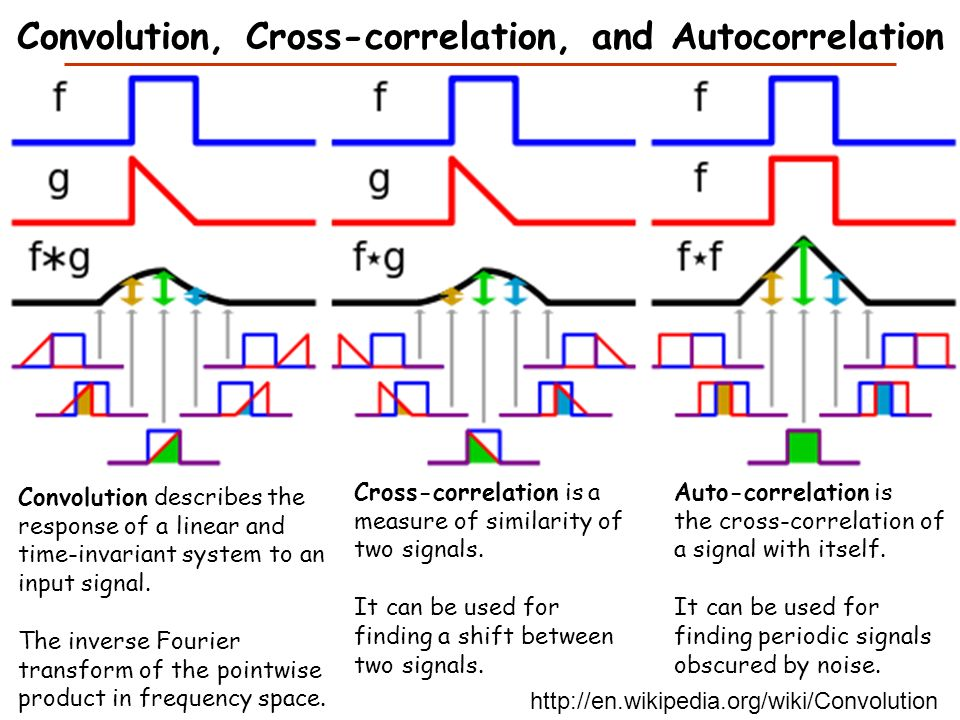

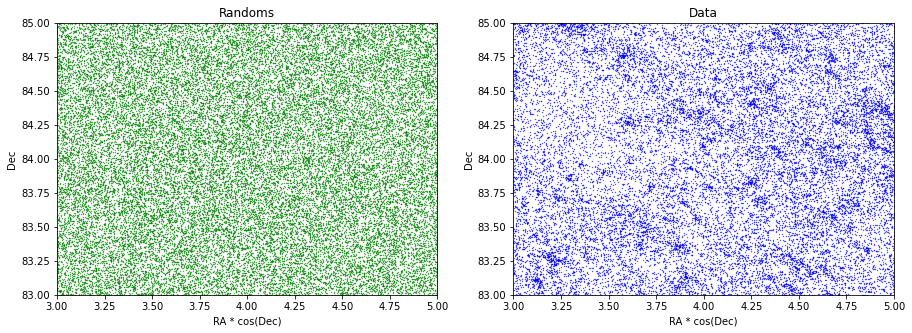

In [26]:
# Example 0 of Scipy.signal

from scipy import signal
from scipy import misc
rng = np.random.default_rng()
face = misc.face(gray=True) - misc.face(gray=True).mean()
template = np.copy(face[300:365, 670:750])  # right eye
template -= template.mean()
face = face + rng.standard_normal(face.shape) * 50  # add noise
corr = signal.correlate2d(face, template, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match

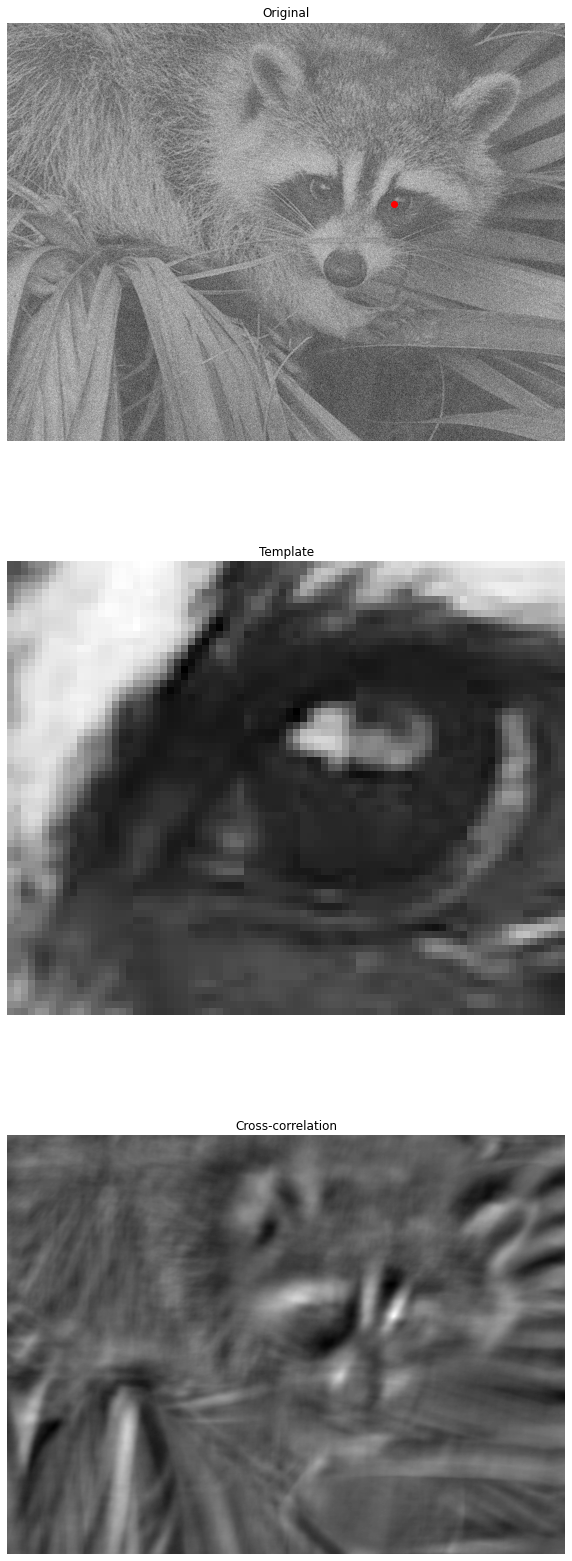

In [27]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,
                                                    figsize=(10, 29))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')

`TreeCorr` is a package for efficiently computing 2-point and 3-point correlation functions.

- https://github.com/rmjarvis/TreeCorr

- `conda update -c conda-forge treecorr`

- https://github.com/rmjarvis/TreeCorr/blob/main/tests/Tutorial.ipynb

- https://rmjarvis.github.io/TreeCorr/_build/html/index.html

In [28]:
# Example 1 of treecorr
import treecorr
import fitsio

file_name = './Aardvark.fit'
data = fitsio.read(file_name)

config_file = './Aardvark.yaml'
config = treecorr.read_config(config_file)

treecorr.corr2(config)

with open('./Aardvark.out') as f:
    print(''.join(f.readlines()[:10]))   # Just the first 10 lines for brevity

Using 8 threads.
   file_type assumed to be FITS from the file name.
Done creating input catalogs
Performing GG calculations...
nbins = 100, min,max sep = 1..400 arcmin, bin_size = 0.0599146
Starting process GG auto-correlations for cat Aardvark.fit.
Reading input file Aardvark.fit
   nobj = 390935
Using 8 threads.
Building GField from cat Aardvark.fit
Starting 259 jobs.
...................................................................................................................................................................................................................................................................
varg = 0.000006: sig_sn (per component) = 0.002456
Done GG calculations.
Writing GG correlations to Aardvark.out
   file_type assumed to be ASCII from the file name.
Wrote GG correlation to Aardvark.out
## {'coords': 'spherical', 'metric': 'Euclidean', 'sep_units': 'arcmin', 'bin_type': 'Log'}
#   r_nom       meanr       meanlogr       xip          xim         xip

In [8]:
# Example 2 of treecorr

file_name = 'Aardvark.fit'

cat = treecorr.Catalog(file_name, ra_col='RA', dec_col='DEC', ra_units='deg', dec_units='deg', g1_col='GAMMA1', 
                       g2_col='GAMMA2', k_col='KAPPA')
gg = treecorr.GGCorrelation(min_sep=1, max_sep=400, nbins=100, sep_units='arcmin')

gg.process(cat)  # Takes approx 1 minute / million objects

Text(0, 0.5, '$\\xi_{+,-}$')

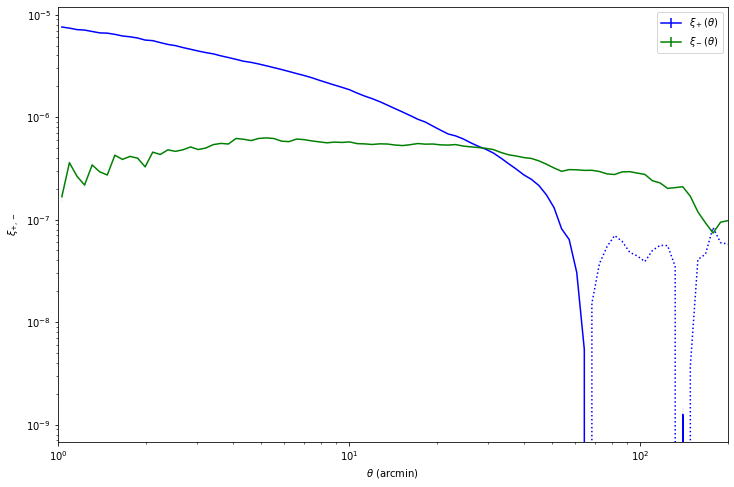

In [29]:
r = np.exp(gg.meanlogr)
xip = gg.xip
xim = gg.xim
sig = np.sqrt(gg.varxip)

pl.figure(figsize=(12, 8))
pl.plot(r, xip, color='blue')
pl.plot(r, -xip, color='blue', ls=':')
pl.errorbar(r[xip>0], xip[xip>0], yerr=sig[xip>0], color='blue', lw=0.1, ls='')
pl.errorbar(r[xip<0], -xip[xip<0], yerr=sig[xip<0], color='blue', lw=0.1, ls='')
lp = pl.errorbar(-r, xip, yerr=sig, color='blue')

pl.plot(r, xim, color='green')
pl.plot(r, -xim, color='green', ls=':')
pl.errorbar(r[xim>0], xim[xim>0], yerr=sig[xim>0], color='green', lw=0.1, ls='')
pl.errorbar(r[xim<0], -xim[xim<0], yerr=sig[xim<0], color='green', lw=0.1, ls='')
lm = pl.errorbar(-r, xim, yerr=sig, color='green')

pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$\theta$ (arcmin)')

pl.legend([lp, lm], [r'$\xi_+(\theta)$', r'$\xi_-(\theta)$'])
pl.xlim( [1,200] )
pl.ylabel(r'$\xi_{+,-}$')

# please read this paper https://ui.adsabs.harvard.edu/abs/2004MNRAS.352..338J/abstract for more details about \xi_{+, -}

# 4. Machine Learning

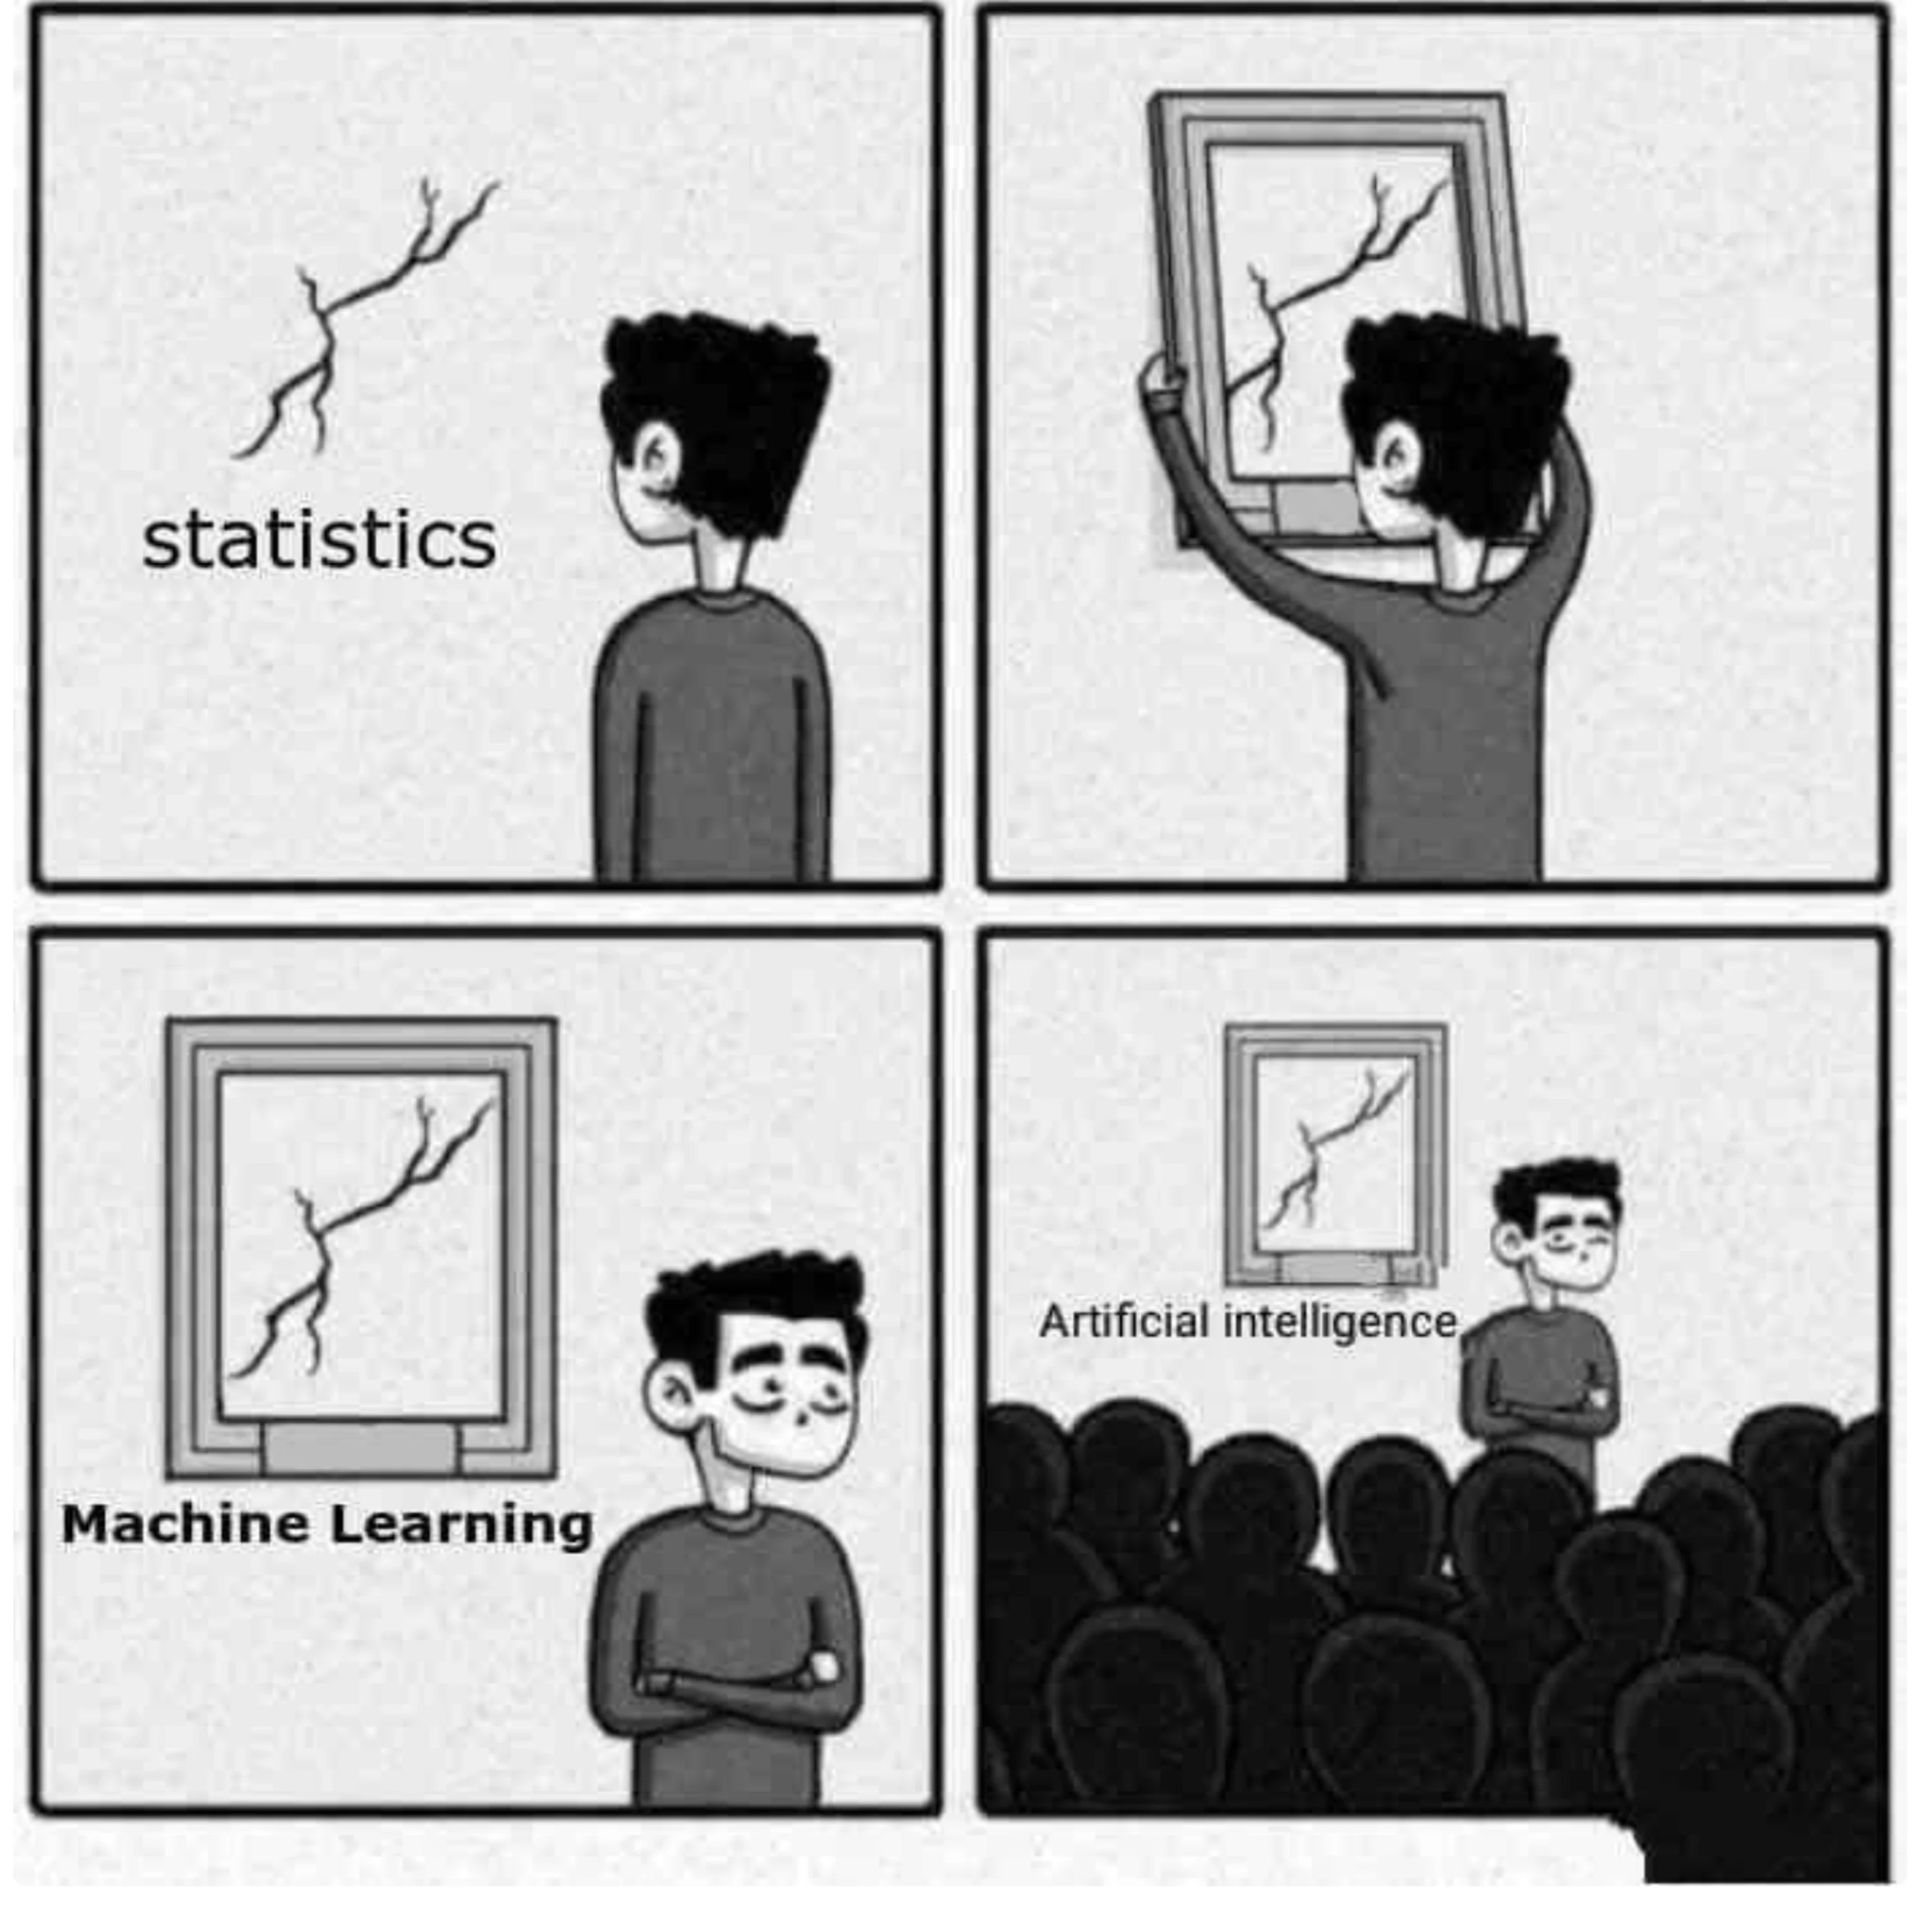

Start with MNIST for classifying handwritten digits, which is the `Hello world!` in machine learning, with machine learning using Scikit-learn 
https://www.kaggle.com/c/digit-recognizer
http://yann.lecun.com/exdb/mnist/

> Read this and try to understand it. https://jayspeidell.github.io/portfolio/project07-galazy-zoo/

In [10]:
%matplotlib inline

import numpy as np
import pylab as pl
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [31]:
## Read in the data
data_dir = "../week3/"
data_train = data_dir + 'MNIST_train.csv'
data_test = data_dir + 'MNIST_test.csv'

train = pd.read_csv(data_train)
test  = pd.read_csv(data_test)
target = train["label"]
train = train.drop("label",1)

/var/folders/7z/hdr_2hpx1td2cw2cxslg7d1w0000gs/T/ipykernel_22348/1732017757.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train = train.drop("label",1)


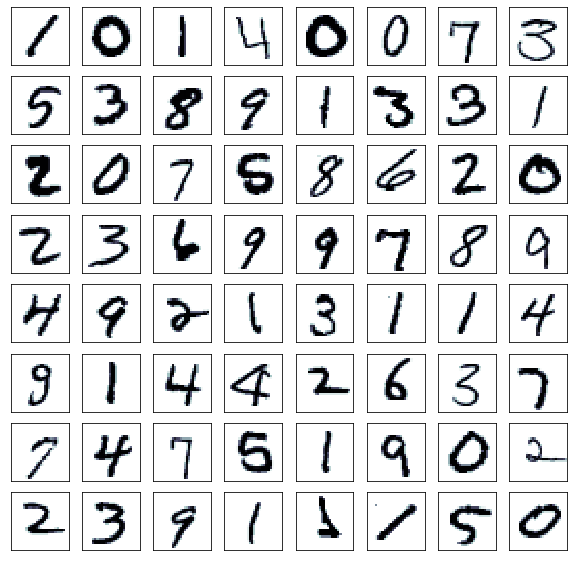

In [32]:
## Visualize some images

pl.figure(figsize=(10,10))
for digit_num in range(0,64):
    pl.subplot(8,8,digit_num+1)
    grid_data = train.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    pl.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    pl.xticks([])
    pl.yticks([])

/Users/Uranus/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


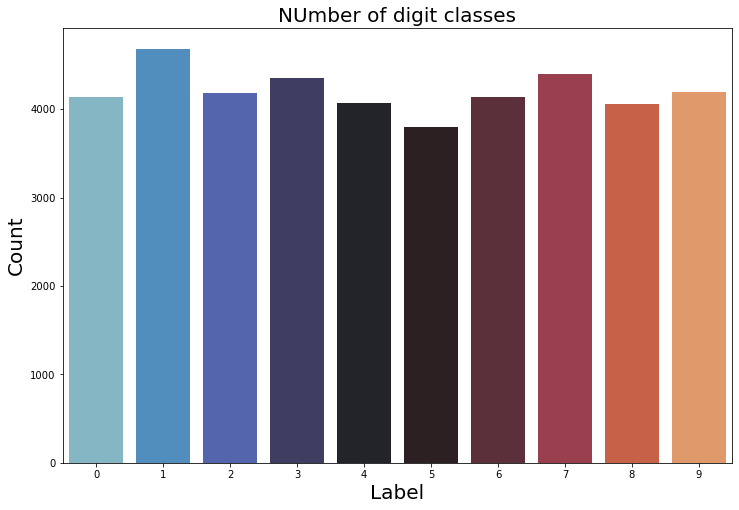

In [33]:
## Visualize the number of class and counts in the datasets

pl.figure(figsize=(12,8))
sns.countplot(target, palette = 'icefire')
pl.title('NUmber of digit classes', fontsize=20)
pl.xlabel('Label', fontsize=20);
pl.ylabel('Count', fontsize=20);

In [34]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier

# create training and validation sets
split_ratio = 0.8
trainX, validX, trainY, validY = train_test_split(train, target, 
                                                  test_size=(1.0-split_ratio), 
                                                  train_size=split_ratio, 
                                                  random_state=0)

# build a model
clf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")

# fit the model
clf.fit(trainX, trainY)

# validate the model
validY_pred = clf.predict(validX)

Accuracy: 

0.9629761904761904 

Confusion Matrix: 



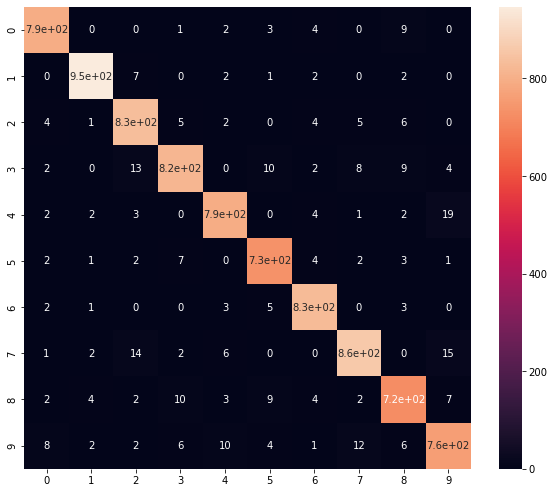

In [35]:
# evaluate the model with the validation set

print("Accuracy: \n")
print(metrics.accuracy_score(y_true=validY, y_pred=validY_pred), "\n")
print("Confusion Matrix: \n")
pl.figure(figsize = (10,8.5))
sns.heatmap(metrics.confusion_matrix(y_true=validY, y_pred=validY_pred), annot=True);

Confidential levels: confidence that the result is real

- 1 sigma -> 68%
- 2 sigma -> 95%
- 3 sigma -> 99.87%